https://colab.research.google.com/drive/1yHwUpFi4nCX-Yr3WBFMRfrW6wVQHqUud?usp=sharing 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import datasets, linear_model
  
# reading the csv file
df = pd.read_csv("sample_data/StudentsPerformance.csv")
  
# updating the column value/data

#gender
df['gender'] = df['gender'].replace({'female': '1'})
df['gender'] = df['gender'].replace({'male': '2'})

#race/ethnicity
df['race/ethnicity'] = df['race/ethnicity'].replace({'group A':'1'})
df['race/ethnicity'] = df['race/ethnicity'].replace({'group B':'2'})
df['race/ethnicity'] = df['race/ethnicity'].replace({'group C':'3'})
df['race/ethnicity'] = df['race/ethnicity'].replace({'group D':'4'})
df['race/ethnicity'] = df['race/ethnicity'].replace({'group E':'5'})

#parental level of education
df['parental level of education'] = df['parental level of education'].replace({'some high school':'1'})
df['parental level of education'] = df['parental level of education'].replace({'high school':'2'})
df['parental level of education'] = df['parental level of education'].replace({"bachelor's degree":'3'})
df['parental level of education'] = df['parental level of education'].replace({'some college':'4'})
df['parental level of education'] = df['parental level of education'].replace({"master's degree":'5'})
df['parental level of education'] = df['parental level of education'].replace({"associate's degree":'6'})

#lunch
df['lunch'] = df['lunch'].replace({'standard':'1'})
df['lunch'] = df['lunch'].replace({'free/reduced':'2'})


#test preparation course
df['test preparation course'] = df['test preparation course'].replace({'none':'1'})
df['test preparation course'] = df['test preparation course'].replace({'completed':'2'})
  
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,3,1,1,72,72,74
1,1,3,4,1,2,69,90,88
2,1,2,5,1,1,90,95,93
3,2,1,6,2,1,47,57,44
4,2,3,4,1,1,76,78,75


Codigo Alex Mate

In [ ]:
import matplotlib.pyplot as plt
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo

#here we just organize our dataset in order to only have inputs and outputs

#outputs
output_Math = 'math score'
output_Reading = 'reading score'
output_Writing = 'writing score'

#inputs
all_X = df.columns.tolist()
all_X.remove(output_Math)
all_X.remove(output_Reading)
all_X.remove(output_Writing)

In [ ]:
#here we can visualize which ones will be our inputs, as wanted
all_X

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
#we need to manage the data of our inputs
#all_X_values = df[all_X].values

# Use only one feature, gender. 
#all_X_values = df['gender'].values 
#all_X_values = np.reshape(all_X_values, (-1, 1))#column vector

# Use only one feature, race/ethnicity. 
#all_X_values = df['race/ethnicity'].values 
#all_X_values = np.reshape(all_X_values, (-1, 1))#column vector

# Use only one feature, parental level of education. 
all_X_values = df['parental level of education'].values 
all_X_values = np.reshape(all_X_values, (-1, 1))#column vector

# Use only one feature, lunch. 
#all_X_values = df['lunch'].values 
#all_X_values = np.reshape(all_X_values, (-1, 1))#column vector

# Use only one feature, test preparation course. 
#all_X_values = df['test preparation course'].values 
#all_X_values = np.reshape(all_X_values, (-1, 1))#column vector


#we need to manage the data of our outputs (for my case is the math test only)
math_score_Y = df[output_Math].values

#split the data into training/testing sets
all_X_values_train = all_X_values[:-200] 
all_X_values_test = all_X_values[-200:] #last 200 for test

#split the targets into training/testing sets
math_score_Y_train = math_score_Y[:-200]
math_score_Y_test = math_score_Y[-200:] 

#As accorded, since we are dealing with 1000 rows of data, we are going to use 800 for training our model and 200 for testing it

Coefficients: 
 theta_values =  [1.83617143]  theta_0  =  65.98625
Mean squared error (MSE Cost): 237.86
Coefficient of determination: 0.02


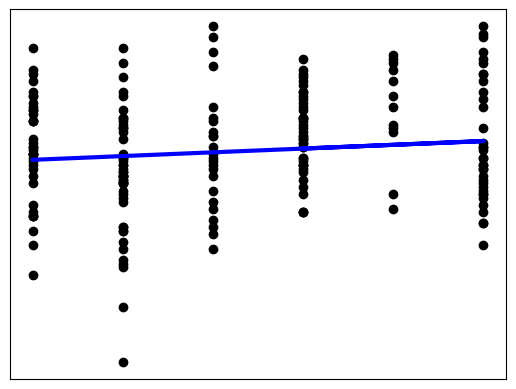

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_X_values_train)# scaler fit is just for training dataset 
all_X_values_train_normalized = scaler.transform(all_X_values_train) #normalize training set

# Train the model using the training sets
regr.fit(all_X_values_train_normalized, math_score_Y_train) # 1. REPRESENTAR hypothesis, 2. EVALUAR MSE Error Cuadratico Medio 3. OPTIMIZAR (Gradient Descent)

# Make predictions using the testing set
all_X_values_test_normalized = scaler.transform(all_X_values_test) #normalize test set 
math_score_Y_pred = regr.predict(all_X_values_test_normalized)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_values = ", regr.coef_, " theta_0  = ", regr.intercept_)
#print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(math_score_Y_test, math_score_Y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(math_score_Y_test, math_score_Y_pred))

#Since we are dealing with multiple variables, plotting the result is not a viable option

# When we deal with only one input, we can get the plot outputs
plt.scatter(all_X_values_test_normalized, math_score_Y_test, color="black")
plt.plot(all_X_values_test_normalized, math_score_Y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
all_X_values_train_normalized[0:10]

array([[0.  , 0.25, 0.4 , 0.  , 0.  ],
       [0.  , 0.5 , 0.6 , 0.  , 1.  ],
       [0.  , 0.25, 0.8 , 0.  , 0.  ],
       [1.  , 0.  , 1.  , 1.  , 0.  ],
       [1.  , 0.5 , 0.6 , 0.  , 0.  ],
       [0.  , 0.25, 1.  , 0.  , 0.  ],
       [0.  , 0.25, 0.6 , 0.  , 1.  ],
       [1.  , 0.25, 0.6 , 1.  , 0.  ],
       [1.  , 0.75, 0.2 , 1.  , 1.  ],
       [0.  , 0.25, 0.2 , 1.  , 0.  ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
lambda_value = 0.001 #hyperparameter 

#classifier = LogisticRegression(penalty='none').fit(all_X_values_train_normalized, math_score_Y_train) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(all_X_values_train_normalized, math_score_Y_train) #spenalty='l2' -> con regularización 

accuracy = classifier.score(all_X_values_train_normalized, math_score_Y_train) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.04625


Codigo Emi Writing

In [ ]:
#we need to manage the data of our inputs
all_X_values = df[all_X].values

#we need to manage the data of our outputs (for my case is the math test only)
writing_score_Y = df[output_Writing].values

#split the data into training/testing sets
all_X_values_train = all_X_values[:-200] 
all_X_values_test = all_X_values[-200:] #last 200 for test

#split the targets into training/testing sets
writing_score_Y_train = writing_score_Y[:-200]
writing_score_Y_test = writing_score_Y[-200:] 

#As accorded, since we are dealing with 1000 rows of data, we are going to use 800 for training our model and 200 for testing it

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_X_values_train)# scaler fit is just for training dataset 
all_X_values_train_normalized = scaler.transform(all_X_values_train) #normalize training set

# Train the model using the training sets
regr.fit(all_X_values_train_normalized, writing_score_Y_train) # 1. REPRESENTAR hypothesis, 2. EVALUAR MSE Error Cuadratico Medio 3. OPTIMIZAR (Gradient Descent)

# Make predictions using the testing set
all_X_values_test_normalized = scaler.transform(all_X_values_test) #normalize test set 
writing_score_Y_pred = regr.predict(all_X_values_test_normalized)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_values = ", regr.coef_, " theta_0  = ", regr.intercept_)
#print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(writing_score_Y_test, writing_score_Y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(writing_score_Y_test, writing_score_Y_pred))

#Since we are dealing with multiple variables, plotting the result is not a viable option

Coefficients: 
 theta_values =  [-4.64148619  1.82684455  2.20106493 -3.63872622  5.07625574]  theta_0  =  67.88375
Mean squared error (MSE Cost): 178.82
Coefficient of determination: 0.26


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
lambda_value = 0.001 #hyperparameter 

#classifier = LogisticRegression(penalty='none').fit(all_X_values_train_normalized, math_score_Y_train) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(all_X_values_train_normalized, writing_score_Y_train) #spenalty='l2' -> con regularización 

accuracy = classifier.score(all_X_values_train_normalized, writing_score_Y_train) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.09


Codigo Juan READING

In [ ]:
#we need to manage the data of our inputs
all_X_values = df[all_X].values

#we need to manage the data of our outputs (for my case is the math test only)
reading_score_Y = df[output_Reading].values

#split the data into training/testing sets
all_X_values_train = all_X_values[:-200] 
all_X_values_test = all_X_values[-200:] #last 200 for test

#split the targets into training/testing sets
reading_score_Y_train = reading_score_Y[:-200]
reading_score_Y_test = reading_score_Y[-200:] 

# Create linear regression object
from sklearn.linear_model import Lasso

#regr_reading=linear_model.LinearRegression()
lambda_value = 10000 #hyperparameter 
regr_reading = Lasso(alpha=1)

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_X_values_train)# scaler fit is just for training dataset 
all_X_values_train_normalized = scaler.transform(all_X_values_train) #normalize training set

# Train the model using the training sets
regr_reading.fit(all_X_values_train_normalized, math_score_Y_train) # 1. REPRESENTAR hypothesis, 2. EVALUAR MSE Error Cuadratico Medio 3. OPTIMIZAR (Gradient Descent)

# Make predictions using the testing set
all_X_values_test_normalized = scaler.transform(all_X_values_test) #normalize test set 
reading_score_Y_pred = regr_reading.predict(all_X_values_test_normalized)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_values = ", regr_reading.coef_, " theta_0  = ", regr_reading.intercept_)
#print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(reading_score_Y_test, reading_score_Y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(reading_score_Y_test, reading_score_Y_pred))

Coefficients: 
 theta_values =  [ 1.38473479  1.74804259  0.79924041 -4.00890501  1.99582076]  theta_0  =  65.98625
Mean squared error (MSE Cost): 218.51
Coefficient of determination: 0.03
